In [7]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
import math
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
callback_early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                                        patience=5, verbose=1)

In [9]:
# Data prep
df=pd.read_csv("date2.csv")
df["Date"]=pd.to_datetime(df["Date"])
df['Price']=pd.to_numeric(df['Price'])
df = df.set_index(["Date"], drop=True)

<Axes: xlabel='Date', ylabel='Seasonal'>

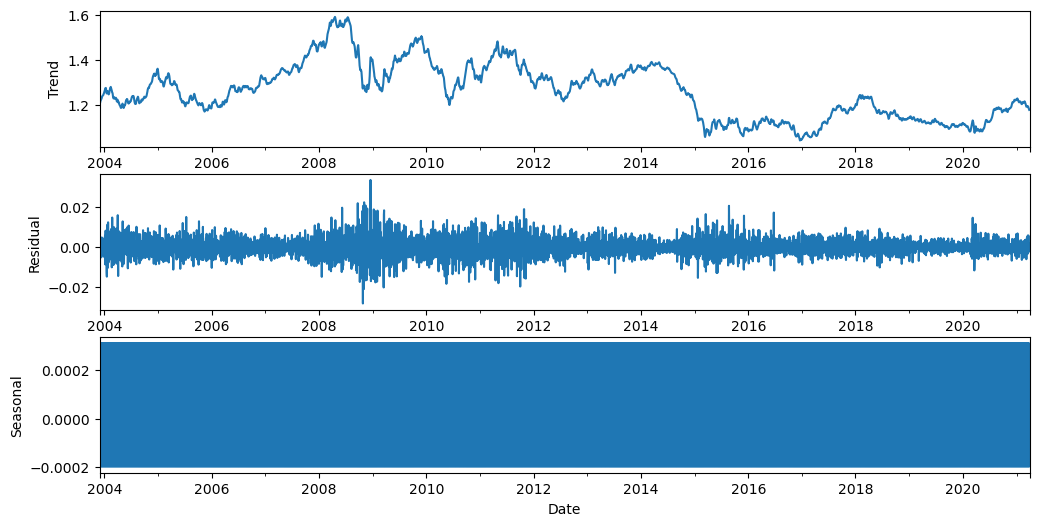

In [10]:
res = seasonal_decompose(df['Price'])
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(12,6),sharey=False)
res.trend.plot(ax=ax1,ylabel='Trend')
res.resid.plot(ax=ax2,ylabel='Residual')
res.seasonal.plot(ax=ax3,ylabel='Seasonal')

In [11]:
train_size = int(len(df) * 0.75)
validation_size= int(len(df) * 0.85)
train, validation, test = np.array(df[0:train_size]), np.array(df[train_size:validation_size]),np.array(df[validation_size:len(df)])
print(len(train), len(validation),len(test))

3392 452 679


In [12]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [13]:
time_step = 5
X_train, y_train = create_dataset(train, time_step)
X_validation, y_validation= create_dataset(validation, time_step)
X_test, y_test = create_dataset(test, time_step)

In [14]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
print(X_train.shape,X_test.shape,X_validation.shape)
#X_train.shape[1]

(3386, 5, 1) (673, 5, 1) (446, 5, 1)


## LSTM

In [15]:
model=keras.Sequential()
model.add(keras.layers.LSTM(5,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(keras.layers.LSTM(5))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
lstm1=model.fit(X_train,y_train,
                validation_data=(X_validation,y_validation),
                epochs=100,
                callbacks=callback_early_stopping)

Epoch 1/100
106/106 [==============================] - 4s 11ms/step - loss: 1.0354 - val_loss: 0.0710
Epoch 2/100
106/106 [==============================] - 0s 4ms/step - loss: 0.0202 - val_loss: 0.0145
Epoch 3/100
106/106 [==============================] - 0s 4ms/step - loss: 0.0078 - val_loss: 0.0135
Epoch 4/100
106/106 [==============================] - 0s 4ms/step - loss: 0.0075 - val_loss: 0.0139
Epoch 5/100
106/106 [==============================] - 0s 4ms/step - loss: 0.0071 - val_loss: 0.0116
Epoch 6/100
106/106 [==============================] - 0s 4ms/step - loss: 0.0067 - val_loss: 0.0108
Epoch 7/100
106/106 [==============================] - 0s 4ms/step - loss: 0.0061 - val_loss: 0.0102
Epoch 8/100
106/106 [==============================] - 0s 4ms/step - loss: 0.0055 - val_loss: 0.0090
Epoch 9/100
106/106 [==============================] - 0s 4ms/step - loss: 0.0049 - val_loss: 0.0078
Epoch 10/100
106/106 [==============================] - 0s 4ms/step - loss: 0.0041 - val_l

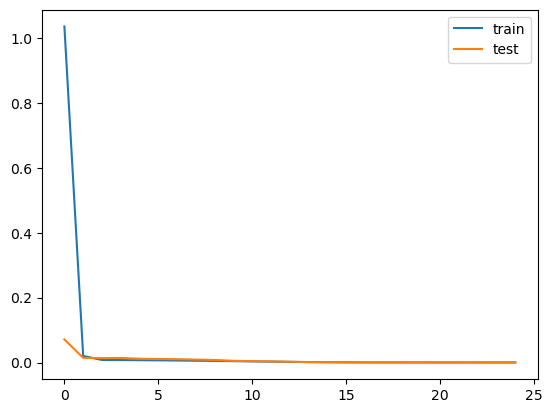

In [16]:
plt.plot(lstm1.history['loss'], label='train')
plt.plot(lstm1.history['val_loss'], label='test')
plt.legend();

22/22 [==============================] - 1s 1ms/step


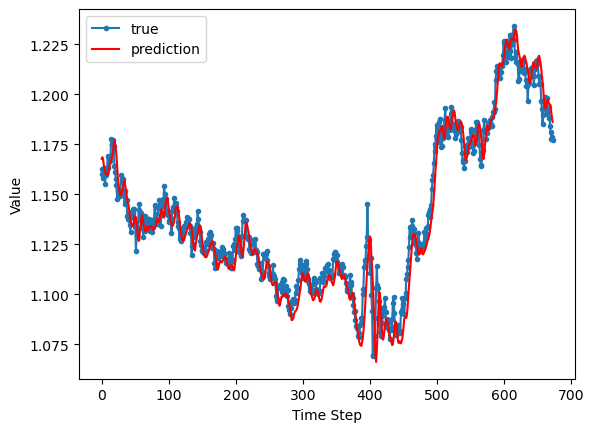

In [17]:
y_pred5 = model.predict(X_test)
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred5, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [18]:
model2=keras.Sequential()
model2.add(keras.layers.LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model2.add(keras.layers.LSTM(50))
model2.add(keras.layers.Dense(1))
model2.compile(loss='mean_squared_error',optimizer='adam')
lstm2=model2.fit(X_train,y_train,
                validation_data=(X_validation,y_validation),
                epochs=100,
                callbacks=callback_early_stopping)

Epoch 1/100
106/106 [==============================] - 4s 13ms/step - loss: 0.1470 - val_loss: 0.0017
Epoch 2/100
106/106 [==============================] - 1s 6ms/step - loss: 7.3745e-04 - val_loss: 0.0011
Epoch 3/100
106/106 [==============================] - 1s 6ms/step - loss: 5.3449e-04 - val_loss: 5.5163e-04
Epoch 4/100
106/106 [==============================] - 1s 6ms/step - loss: 3.7947e-04 - val_loss: 3.1866e-04
Epoch 5/100
106/106 [==============================] - 1s 6ms/step - loss: 2.7123e-04 - val_loss: 1.7355e-04
Epoch 6/100
106/106 [==============================] - 1s 6ms/step - loss: 2.1710e-04 - val_loss: 1.1340e-04
Epoch 7/100
106/106 [==============================] - 1s 8ms/step - loss: 1.9601e-04 - val_loss: 7.1443e-05
Epoch 8/100
106/106 [==============================] - 1s 7ms/step - loss: 1.8874e-04 - val_loss: 6.9557e-05
Epoch 9/100
106/106 [==============================] - 1s 7ms/step - loss: 1.8623e-04 - val_loss: 7.0291e-05
Epoch 10/100
106/106 [========

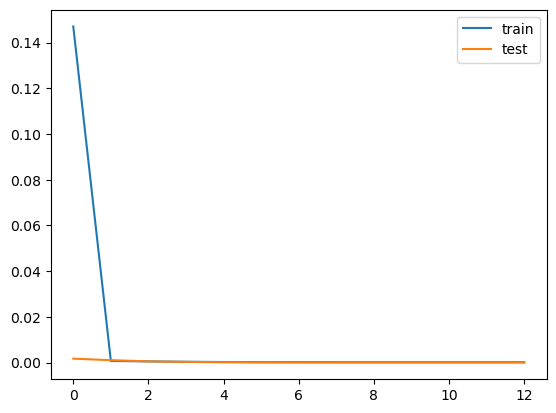

In [19]:
plt.plot(lstm2.history['loss'], label='train')
plt.plot(lstm2.history['val_loss'], label='test')
plt.legend();

22/22 [==============================] - 1s 2ms/step


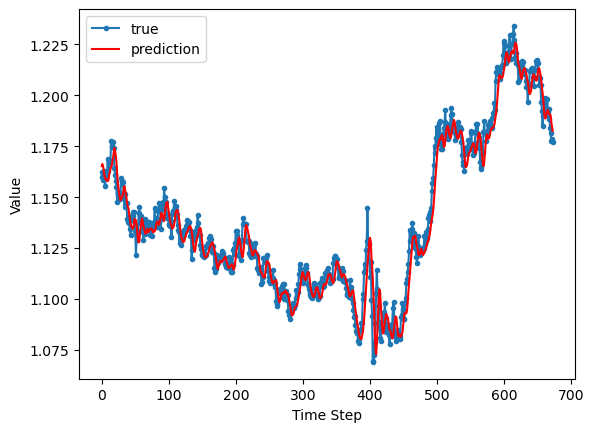

In [20]:
y_pred50 = model2.predict(X_test)
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred50, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [22]:
print("Eroarea RMSE pe setul de testare in cazul retelei cu 5 neuroni este: ", math.sqrt(mean_squared_error(y_test,y_pred5)))
print("Eroarea RMSE pe setul de testare in cazul retelei cu 50 neuroni este: ", math.sqrt(mean_squared_error(y_test,y_pred50)))

Eroarea RMSE pe setul de testare in cazul retelei cu 5 neuroni este:  0.008670484359471592
Eroarea RMSE pe setul de testare in cazul retelei cu 50 neuroni este:  0.007921471660682241


In [21]:
testare=np.array(df[500:2852])
X_test1, y_test1 = create_dataset(testare, time_step)
X_test1 = X_test1.reshape(X_test1.shape[0],X_test1.shape[1] , 1)
y_pred51 = model2.predict(X_test1)

74/74 [==============================] - 0s 2ms/step


In [23]:
testare2=np.array(df[2000:4523])
X_test2, y_test2 = create_dataset(testare2, time_step)
X_test2 = X_test2.reshape(X_test2.shape[0],X_test2.shape[1] , 1)
y_pred52 = model2.predict(X_test2)

79/79 [==============================] - 0s 2ms/step


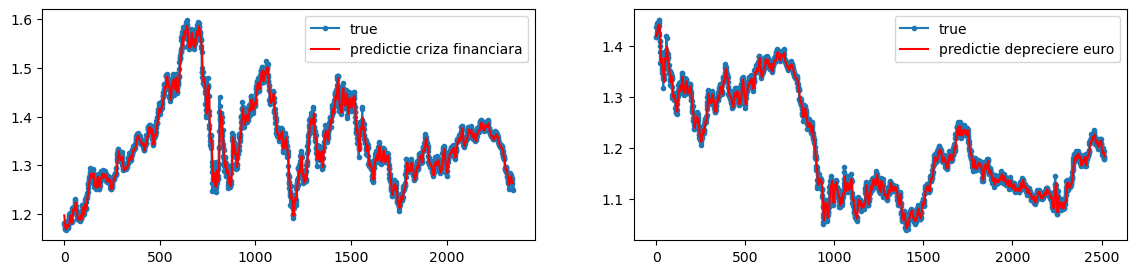

Eroarea RMSE este:  0.014161258914846793
Eroarea RMSE este:  0.009916706037727164


In [24]:
fig, axs = plt.subplots(1, 2, figsize=(14, 3), sharey=False)
axs[0].plot(y_test1, marker='.', label="true")
axs[0].plot(y_pred51, 'r', label="predictie criza financiara")
axs[0].legend()
axs[1].plot(y_test2, marker='.', label="true")
axs[1].plot(y_pred52, 'r', label="predictie depreciere euro")
axs[1].legend()
plt.show();
print("Eroarea RMSE este: ", math.sqrt(mean_squared_error(y_test1,y_pred51)))
print("Eroarea RMSE este: ", math.sqrt(mean_squared_error(y_test2,y_pred52)))

Set de antrenare mai mic

In [25]:
antrenare=np.array(df[:779])
validare=np.array(df[780:1064])
X_train1, y_train1 = create_dataset(antrenare, time_step)
X_validation1, y_validation1= create_dataset(validare, time_step)
X_train1 =X_train1.reshape(X_train1.shape[0],X_train1.shape[1] , 1)
X_validation1=X_validation1.reshape(X_validation1.shape[0],X_validation1.shape[1] , 1)
X_validation1=X_validation1.reshape(X_validation1.shape[0],X_validation1.shape[1] , 1)
print(X_train1.shape,y_train1.shape,X_validation1.shape,y_validation1.shape)

(773, 5, 1) (773,) (278, 5, 1) (278,)


In [26]:
model3=keras.Sequential()
model3.add(keras.layers.LSTM(50,return_sequences=True,input_shape=(X_train1.shape[1],1)))
model3.add(keras.layers.LSTM(50))
model3.add(keras.layers.Dense(1))
model3.compile(loss='mean_squared_error',optimizer='adam')
lstm3=model.fit(X_train1,y_train1,
                validation_data=(X_validation1,y_validation1),
                epochs=100,
                callbacks=callback_early_stopping)

Epoch 1/100
25/25 [==============================] - 0s 7ms/step - loss: 1.3220e-04 - val_loss: 8.3005e-05
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 1.3230e-04 - val_loss: 1.0727e-04
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 1.3323e-04 - val_loss: 8.4140e-05
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 1.2814e-04 - val_loss: 9.9757e-05
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 1.3154e-04 - val_loss: 8.5618e-05
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 1.2582e-04 - val_loss: 9.0612e-05
Epoch 6: early stopping


In [27]:
y_pred53 = model3.predict(X_test1)

74/74 [==============================] - 1s 2ms/step


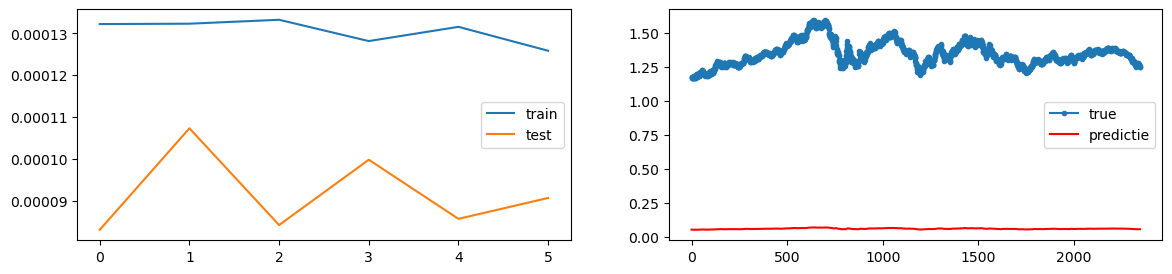

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(14, 3), sharey=False)
axs[0].plot(lstm3.history['loss'], label='train')
axs[0].plot(lstm3.history['val_loss'], label='test')
axs[0].legend()
axs[1].plot(y_test1, marker='.', label="true")
axs[1].plot(y_pred53, 'r', label="predictie")
axs[1].legend()
plt.show();

In [29]:
model4=keras.Sequential()
model4.add(keras.layers.LSTM(261,return_sequences=True,input_shape=(X_train1.shape[1],1)))
model4.add(keras.layers.LSTM(261))
model4.add(keras.layers.Dense(1))
model4.compile(loss='mean_squared_error',optimizer='adam')
lstm4=model4.fit(X_train1,y_train1,
                validation_data=(X_validation1,y_validation1),
                epochs=100,
                callbacks=callback_early_stopping)

Epoch 1/100
25/25 [==============================] - 4s 43ms/step - loss: 0.2272 - val_loss: 0.0227
Epoch 2/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0061 - val_loss: 0.0066
Epoch 3/100
25/25 [==============================] - 0s 14ms/step - loss: 6.5629e-04 - val_loss: 4.8666e-04
Epoch 4/100
25/25 [==============================] - 0s 14ms/step - loss: 2.3875e-04 - val_loss: 7.5790e-04
Epoch 5/100
25/25 [==============================] - 0s 14ms/step - loss: 1.9299e-04 - val_loss: 0.0012
Epoch 6/100
25/25 [==============================] - 0s 14ms/step - loss: 1.9045e-04 - val_loss: 7.7122e-04
Epoch 7/100
25/25 [==============================] - 0s 14ms/step - loss: 1.8562e-04 - val_loss: 9.1567e-04
Epoch 8/100
25/25 [==============================] - 0s 16ms/step - loss: 1.9267e-04 - val_loss: 6.0215e-04
Epoch 8: early stopping


In [30]:
y_pred54 = model4.predict(X_test1)

74/74 [==============================] - 1s 4ms/step


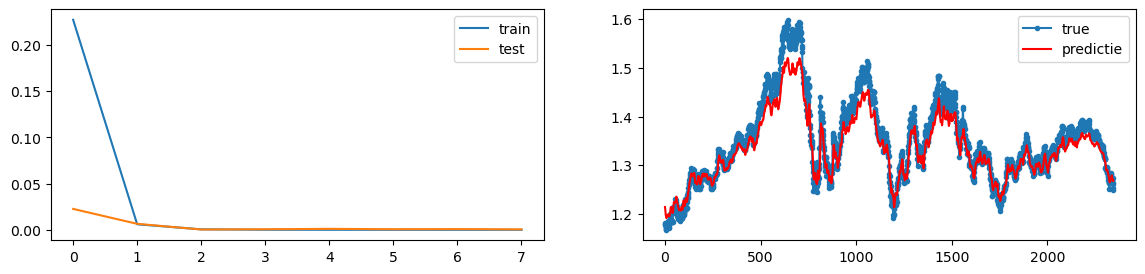

Eroarea RMSE este:  0.027299365021914247


In [31]:
fig, axs = plt.subplots(1, 2, figsize=(14, 3), sharey=False)
axs[0].plot(lstm4.history['loss'], label='train')
axs[0].plot(lstm4.history['val_loss'], label='test')
axs[0].legend()
axs[1].plot(y_test1, marker='.', label="true")
axs[1].plot(y_pred54, 'r', label="predictie")
axs[1].legend()
plt.show();
print("Eroarea RMSE este: ", math.sqrt(mean_squared_error(y_test1,y_pred54)))

## MLP 

In [32]:
mlp_trainx, mlp_trainy = create_dataset(train, time_step)
mlp_validationx, mlp_validationy= create_dataset(validation, time_step)
mlp_testx, mlp_testy = create_dataset(test, time_step)
print(mlp_trainx.shape,mlp_trainy.shape,mlp_validationx.shape,mlp_validationy.shape,mlp_testx.shape,mlp_testy.shape)

(3386, 5) (3386,) (446, 5) (446,) (673, 5) (673,)


In [33]:
model5 = keras.Sequential()
model5.add(keras.layers.Dense(5, input_dim=5, activation='relu'))
model5.add(keras.layers.Dense(1))
model5.compile(loss='mean_squared_error', optimizer='adam')
mlp1=model5.fit(mlp_trainx, mlp_trainy,
                validation_data=(mlp_validationx, mlp_validationy),
                epochs=100,
                callbacks=callback_early_stopping)


Epoch 1/100
106/106 [==============================] - 1s 3ms/step - loss: 6.5318 - val_loss: 3.4278
Epoch 2/100
106/106 [==============================] - 0s 1ms/step - loss: 3.3676 - val_loss: 1.8323
Epoch 3/100
106/106 [==============================] - 0s 1ms/step - loss: 1.8685 - val_loss: 0.9741
Epoch 4/100
106/106 [==============================] - 0s 1ms/step - loss: 1.0973 - val_loss: 0.7042
Epoch 5/100
106/106 [==============================] - 0s 1ms/step - loss: 0.9199 - val_loss: 0.6040
Epoch 6/100
106/106 [==============================] - 0s 1ms/step - loss: 0.8043 - val_loss: 0.5101
Epoch 7/100
106/106 [==============================] - 0s 1ms/step - loss: 0.6958 - val_loss: 0.4242
Epoch 8/100
106/106 [==============================] - 0s 1ms/step - loss: 0.5959 - val_loss: 0.3471
Epoch 9/100
106/106 [==============================] - 0s 1ms/step - loss: 0.5054 - val_loss: 0.2792
Epoch 10/100
106/106 [==============================] - 0s 1ms/step - loss: 0.4246 - val_lo

22/22 [==============================] - 0s 924us/step


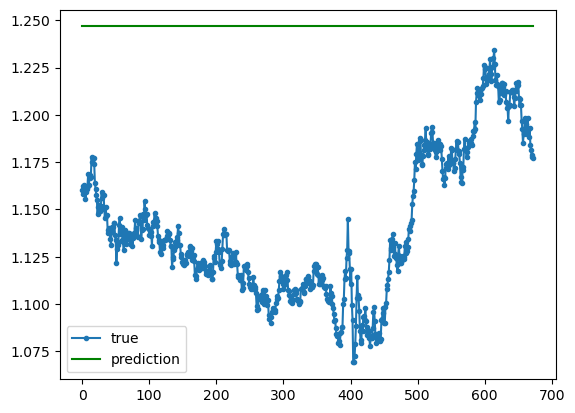

In [34]:
mlp_pred1 = model5.predict(mlp_testx)
testPredictPlot = np.empty_like(df[3850:])
testPredictPlot[:, :] = np.nan
testPredictPlot = mlp_pred1 
plt.plot(mlp_testy, marker='.', label="true")
plt.plot(testPredictPlot, 'g', label="prediction")
plt.legend()
plt.show()

In [35]:
model6 = keras.Sequential()
model6.add(keras.layers.Dense(261, input_dim=5, activation='relu'))
model6.add(keras.layers.Dense(1))
model6.compile(loss='mean_squared_error', optimizer='adam')
mlp2=model6.fit(mlp_trainx, mlp_trainy,
                validation_data=(mlp_validationx, mlp_validationy),
                epochs=100,
                callbacks=callback_early_stopping)


Epoch 1/100
106/106 [==============================] - 1s 3ms/step - loss: 0.0506 - val_loss: 1.8905e-04
Epoch 2/100
106/106 [==============================] - 0s 1ms/step - loss: 2.3364e-04 - val_loss: 1.5099e-04
Epoch 3/100
106/106 [==============================] - 0s 1ms/step - loss: 2.2919e-04 - val_loss: 1.3991e-04
Epoch 4/100
106/106 [==============================] - 0s 1ms/step - loss: 2.2359e-04 - val_loss: 1.5244e-04
Epoch 5/100
106/106 [==============================] - 0s 2ms/step - loss: 2.1481e-04 - val_loss: 1.5419e-04
Epoch 6/100
106/106 [==============================] - 0s 1ms/step - loss: 2.0778e-04 - val_loss: 1.2372e-04
Epoch 7/100
106/106 [==============================] - 0s 1ms/step - loss: 2.0152e-04 - val_loss: 1.2441e-04
Epoch 8/100
106/106 [==============================] - 0s 1ms/step - loss: 1.9600e-04 - val_loss: 1.2283e-04
Epoch 9/100
106/106 [==============================] - 0s 1ms/step - loss: 1.9047e-04 - val_loss: 1.1200e-04
Epoch 10/100
106/106 [=

22/22 [==============================] - 0s 1ms/step


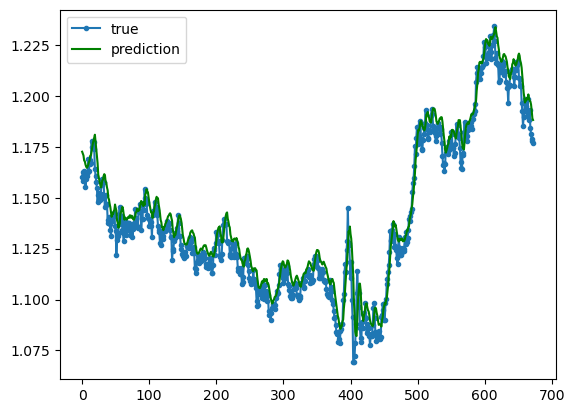

In [36]:
mlp_pred2 = model6.predict(mlp_testx)
testPredictPlot2 = np.empty_like(df[3850:])
testPredictPlot2[:, :] = np.nan
testPredictPlot2 = mlp_pred2 
plt.plot(mlp_testy, marker='.', label="true")
plt.plot(testPredictPlot2, 'g', label="prediction")
plt.legend()
plt.show()

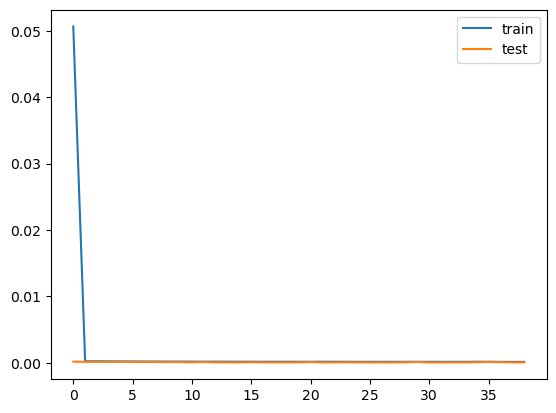

In [37]:
plt.plot(mlp2.history['loss'], label='train')
plt.plot(mlp2.history['val_loss'], label='test')
plt.legend();

In [38]:
model7 = keras.Sequential()
model7.add(keras.layers.Dense(904, input_dim=5, activation='relu'))
model7.add(keras.layers.Dense(261, activation='relu'))
model7.add(keras.layers.Dense(1))
model7.compile(loss='mean_squared_error', optimizer='adam')
mlp3=model7.fit(mlp_trainx, mlp_trainy,
                validation_data=(mlp_validationx, mlp_validationy),
                epochs=100,
                callbacks=callback_early_stopping)


Epoch 1/100
106/106 [==============================] - 1s 3ms/step - loss: 0.0456 - val_loss: 1.0288e-04
Epoch 2/100
106/106 [==============================] - 0s 2ms/step - loss: 1.5293e-04 - val_loss: 6.6449e-05
Epoch 3/100
106/106 [==============================] - 0s 2ms/step - loss: 1.4633e-04 - val_loss: 6.1342e-05
Epoch 4/100
106/106 [==============================] - 0s 2ms/step - loss: 1.4459e-04 - val_loss: 5.9015e-05
Epoch 5/100
106/106 [==============================] - 0s 2ms/step - loss: 1.4240e-04 - val_loss: 6.4222e-05
Epoch 6/100
106/106 [==============================] - 0s 2ms/step - loss: 1.4771e-04 - val_loss: 7.2454e-05
Epoch 7/100
106/106 [==============================] - 0s 2ms/step - loss: 1.4679e-04 - val_loss: 5.8362e-05
Epoch 8/100
106/106 [==============================] - 0s 2ms/step - loss: 1.3762e-04 - val_loss: 5.6624e-05
Epoch 9/100
106/106 [==============================] - 0s 2ms/step - loss: 1.3631e-04 - val_loss: 8.8766e-05
Epoch 10/100
106/106 [=

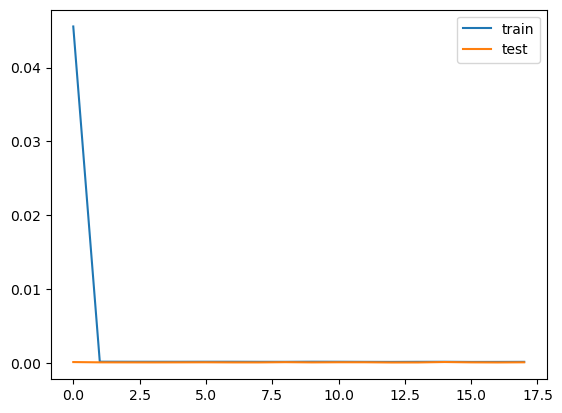

In [39]:
plt.plot(mlp3.history['loss'], label='train')
plt.plot(mlp3.history['val_loss'], label='test')
plt.legend();

22/22 [==============================] - 0s 1ms/step


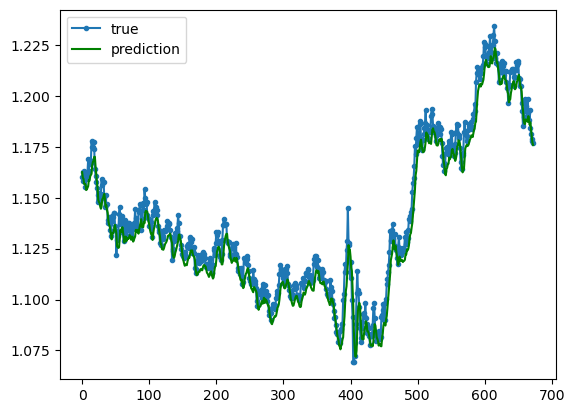

In [40]:
mlp_pred3= model7.predict(mlp_testx)
testPredictPlot3 = np.empty_like(df[3850:])
testPredictPlot3[:, :] = np.nan
testPredictPlot3 = mlp_pred3
plt.plot(mlp_testy, marker='.', label="true")
plt.plot(testPredictPlot3, 'g', label="prediction")
plt.legend()
plt.show()

In [41]:
print("Eroarea RMSE pe setul de testare in cazul retelei cu 5 neuroni este: ", math.sqrt(mean_squared_error(mlp_testy,mlp_pred1)))
print("Eroarea RMSE pe setul de testare in cazul retelei cu 261 neuroni este: ", math.sqrt(mean_squared_error(mlp_testy,mlp_pred2)))
print("Eroarea RMSE pe setul de testare in cazul retelei cu 2 straturi ascunse: ", math.sqrt(mean_squared_error(mlp_testy,mlp_pred3)))

Eroarea RMSE pe setul de testare in cazul retelei cu 5 neuroni este:  0.11351933566603328
Eroarea RMSE pe setul de testare in cazul retelei cu 261 neuroni este:  0.008369528859265788
Eroarea RMSE pe setul de testare in cazul retelei cu 2 straturi ascunse:  0.007689727218645537


In [42]:
testare=np.array(df[500:2852])
X_test1, y_test1 = create_dataset(testare, time_step)
mlp_pred51 = model6.predict(X_test1)
testare2=np.array(df[2000:4523])
X_test2, y_test2 = create_dataset(testare2, time_step)
mlp_pred52 = model6.predict(X_test2)

79/79 [==============================] - 0s 781us/step


In [40]:
testPredictPlot5 = np.empty_like(df[500:2852])
testPredictPlot5[:, :] = np.nan
testPredictPlot5 = mlp_pred51
testPredictPlot6 = np.empty_like(df[2000:4523])
testPredictPlot6[:, :] = np.nan
testPredictPlot6 = mlp_pred52

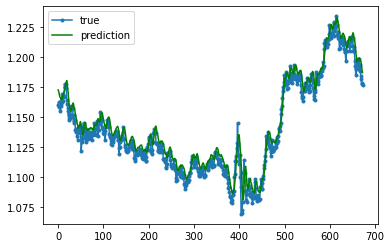

In [41]:
plt.plot(mlp_testy, marker='.', label="true")
plt.plot(testPredictPlot3, 'g', label="prediction")
plt.legend()
plt.show()

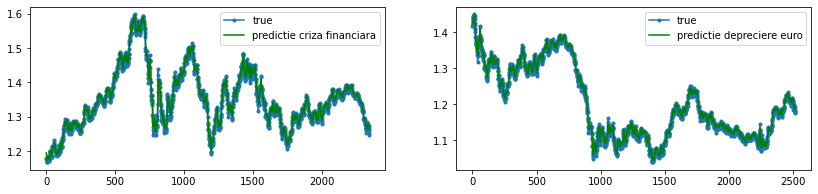

Eroarea RMSE este:  0.011036353816479128
Eroarea RMSE este:  0.00809594880949367


In [42]:
fig, axs = plt.subplots(1, 2, figsize=(14, 3), sharey=False)
axs[0].plot(y_test1, marker='.', label="true")
axs[0].plot(mlp_pred51, 'g', label="predictie criza financiara")
axs[0].legend()
axs[1].plot(y_test2, marker='.', label="true")
axs[1].plot(mlp_pred52, 'g', label="predictie depreciere euro")
axs[1].legend()
plt.show();
print("Eroarea RMSE este: ", math.sqrt(mean_squared_error(y_test1,mlp_pred51)))
print("Eroarea RMSE este: ", math.sqrt(mean_squared_error(y_test2,mlp_pred52)))

In [43]:
antrenare=np.array(df[:779])
validare=np.array(df[780:1064])
mlp_trainxm, mlp_trainym = create_dataset(antrenare, time_step)
mlp_validationxm, mlp_validationym= create_dataset(validare, time_step)

In [44]:
model8 = keras.Sequential()
model8.add(keras.layers.Dense(261, input_dim=5, activation='relu'))
model8.add(keras.layers.Dense(1))
model8.compile(loss='mean_squared_error', optimizer='adam')
mlp4=model8.fit(mlp_trainxm, mlp_trainym,
                validation_data=(mlp_validationxm, mlp_validationym),
                epochs=100,
                callbacks=callback_early_stopping)


Epoch 1/100
25/25 [==============================] - 0s 5ms/step - loss: 0.4691 - val_loss: 0.0724
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0254 - val_loss: 0.0101
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 2.1766e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 2.4170e-04 - val_loss: 4.6142e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 1.1817e-04 - val_loss: 3.1214e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 1.1627e-04 - val_loss: 2.8513e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 1.1472e-04 - val_loss: 2.8226e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 1.1455e-04 - val_loss: 3.1378e-04
Epoch 00008: early stopping


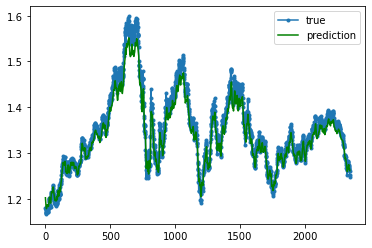

Eroarea RMSE este:  0.01939461197023371


In [45]:
mlp_pred4= model8.predict(X_test1)
testPredictPlot41 = np.empty_like(df[3850:])
testPredictPlot41[:, :] = np.nan
testPredictPlot41 = mlp_pred4
plt.plot(y_test1, marker='.', label="true")
plt.plot(testPredictPlot41, 'g', label="prediction")
plt.legend()
plt.show()
print("Eroarea RMSE este: ", math.sqrt(mean_squared_error(y_test1,mlp_pred4)))

In [46]:
print("Eroarea RMSE pe setul de testare in cazul retelei LSTM cu 50 neuroni este: ", math.sqrt(mean_squared_error(y_test,y_pred50)))
print("Eroarea RMSE pe setul de testare in cazul retelei MLP cu 261 neuroni este: ", math.sqrt(mean_squared_error(mlp_testy,mlp_pred2)))

Eroarea RMSE pe setul de testare in cazul retelei LSTM cu 50 neuroni este:  0.00806352972869824
Eroarea RMSE pe setul de testare in cazul retelei MLP cu 261 neuroni este:  0.006425154856044642
